In [63]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline
place_name = "ST KILDA ROAD CENTRAL, VIC, AU" 
graph = ox.graph_from_place(place_name)

ValueError: Nominatim geocoder returned 0 results for query "ST KILDA ROAD CENTRAL, VIC, AU"

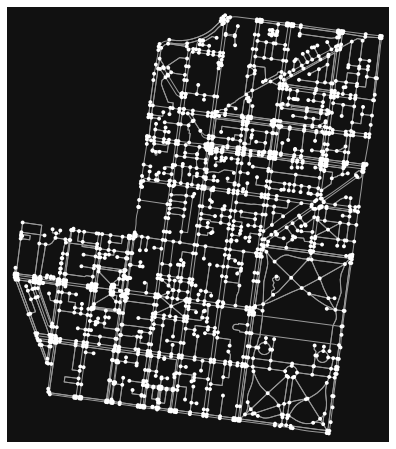

In [ ]:
fig, ax = ox.plot_graph(graph)

<AxesSubplot:>

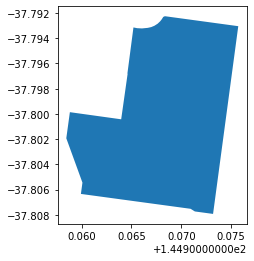

In [68]:
area = ox.geocode_to_gdf(place_name)
area.plot()


In [83]:
buildings = ox.geometries_from_place(place_name, tags={'building':True})
print(len(buildings))
buildings


/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


1922


amenity  \
element_type osmid                
node         4376827445     NaN   
             4376827446     NaN   
             4446987265     NaN   
             4464314690     NaN   
             4518451068     NaN   
...                         ...   
way          1082473615     NaN   
             1082473616     NaN   
             1082473617     NaN   
             1082473618     NaN   
relation     5987261        NaN   

                                                                  geometry  \
element_type osmid                                                           
node         4376827445                        POINT (144.96019 -37.80616)   
             4376827446                        POINT (144.96824 -37.80703)   
             4446987265                        POINT (144.96013 -37.80620)   
             4464314690                        POINT (144.96799 -37.80188)   
             4518451068                        POINT (144.96405 -37.80485)   
...                                                                    ...   
way          1082473615  POLYGON ((144.96444 -37.80544, 144.96444 -37.8...   
             1082473616  POLYGON ((144.96450 -37.80497, 144.96447 -37.8...   
             1082473617  POLYGON ((144.96444 -37.80540, 144.96448 -37.8...   
             1082473618  POLYGON ((144.96408 -37.80554, 144.96409 -37.8...   
relation     5987261     MULTIPOLYGON (((144.96497 -37.79829, 144.96499...   

                        name wheelchair access addr:housenumber  \
element_type osmid                                                
node         4376827445  NaN        NaN    NaN              214   
             4376827446  NaN        NaN    NaN               22   
             4446987265  NaN        NaN    NaN              216   
             4464314690  NaN        NaN    NaN              191   
             4518451068  NaN        NaN    NaN              137   
...                      ...        ...    ...              ...   
way          1082473615  NaN        NaN    NaN              NaN   
             1082473616  NaN        NaN    NaN              NaN   
             1082473617  NaN        NaN    NaN              NaN   
             1082473618  NaN        NaN    NaN              NaN   
relation     5987261     NaN        NaN    NaN              NaN   

                                addr:street building addr:postcode  \
element_type osmid                                                   
node         4376827445     Victoria Street      yes           NaN   
             4376827446     Victoria Street      yes           NaN   
             4446987265     Victoria Street      yes           NaN   
             4464314690     Drummond Street      yes           NaN   
             4518451068  Queensberry Street      yes           NaN   
...                                     ...      ...           ...   
way          1082473615                 NaN      yes           NaN   
             1082473616                 NaN      yes           NaN   
             1082473617                 NaN      yes           NaN   
             1082473618                 NaN      yes           NaN   
relation     5987261                    NaN      yes           NaN   

                        addr:suburb  ... email real_fire  ele  \
element_type osmid                   ...                        
node         4376827445         NaN  ...   NaN       NaN  NaN   
             4376827446         NaN  ...   NaN       NaN  NaN   
             4446987265         NaN  ...   NaN       NaN  NaN   
             4464314690         NaN  ...   NaN       NaN  NaN   
             4518451068         NaN  ...   NaN       NaN  NaN   
...                             ...  ...   ...       ...  ...   
way          1082473615         NaN  ...   NaN       NaN  NaN   
             1082473616         NaN  ...   NaN       NaN  NaN   
             1082473617         NaN  ...   NaN       NaN  NaN   
             1082473618         NaN  ...   NaN       Na

0


,geometry


In [70]:
restaurants = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "restaurant"}
                                 )
len(restaurants)                       

86

In [84]:
schools = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "school"}
                                 )
schools   

nodes  \
element_type osmid                                                         
way          27521869  [302131211, 6612477925, 302131212, 302131213, ...   
             30066634  [331167690, 767789527, 331167692, 9378006228, ...   

                      amenity                            name  \
element_type osmid                                              
way          27521869  school          Carlton Primary School   
             30066634  school  Carlton Gardens Primary School   

                                                                geometry  \
element_type osmid                                                         
way          27521869  POLYGON ((144.96942 -37.79603, 144.96965 -37.7...   
             30066634  POLYGON ((144.96950 -37.80225, 144.96897 -37.8...   

                       wikidata  
element_type osmid               
way          27521869       NaN  
             30066634  Q5043002

In [85]:
malls = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "mall"}
                                 )
malls  

,geometry


In [87]:
university = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "university"}
                                 )
university  

name  \
element_type osmid                                            
node         676560593         RMIT Mosque / Islamic Centre   
             7228317548  RMIT City Campus Children's Centre   
             7228317550                RMIT Electric Racing   
             7228317551                    RMIT Building 56   
way          26564452                       RMIT University   
             773893268        RMIT University (City Campus)   
             773893269                                  NaN   
             802410096              University of Melbourne   

                                                                  geometry  \
element_type osmid                                                           
node         676560593                         POINT (144.96570 -37.80659)   
             7228317548                        POINT (144.96574 -37.80642)   
             7228317550                        POINT (144.96590 -37.80555)   
             7228317551                        POINT (144.96594 -37.80514)   
way          26564452    POLYGON ((144.96488 -37.80489, 144.96601 -37.8...   
             773893268   POLYGON ((144.96341 -37.80657, 144.96407 -37.8...   
             773893269   POLYGON ((144.96253 -37.80647, 144.96275 -37.8...   
             802410096   POLYGON ((144.96481 -37.79699, 144.96564 -37.7...   

                        addr:city addr:housenumber addr:postcode  \
element_type osmid                                                 
node         676560593    Carlton               11          3053   
             7228317548       NaN              NaN           NaN   
             7228317550       NaN              NaN           NaN   
             7228317551       NaN              NaN           NaN   
way          26564452         NaN              NaN          3010   
             773893268        NaN              NaN          3010   
             773893269        NaN              NaN          3010   
             802410096        NaN              NaN           NaN   

                          addr:street     amenity                       note  \
element_type osmid                                                             
node         676560593   Lygon Street  university  Accessibility: category 5   
             7228317548           NaN  university  Accessibility: category 5   
             7228317550           NaN  university  Accessibility: category 5   
             7228317551           NaN  university  Accessibility: category 5   
way          26564452             NaN  university                        NaN   
             773893268            NaN  university                        NaN   
             773893269            NaN  university                        NaN   
             802410096            NaN  university                        NaN   

                               operator  \
element_type osmid                        
node         676560593   RMT Univeristy   
             7228317548            RMIT   
             7228317550            RMIT   
             7228317551            RMIT   
way          26564452               NaN   
             773893268              NaN   
             773893269              NaN   
             802410096              NaN   

                                                                     nodes  \
element_type osmid                                                           
node         676560593                                                 NaN   
             7228317548                                                NaN   
             7228317550                                                NaN   
             7228317551                                                NaN   
way          26564452    [7207590713, 7207590715, 7207590712, 291210823...   
             773893268   [7223709536, 7223709537, 291210423, 291210261,...   
             773893269   [7223709539, 7223709540, 7223709541, 199812950...   
             802410096   [75

In [19]:
l = {}
buildings = ox.geometries_from_place(place_name, tags = {'amenity':True, 'landuse':['retail','commercial']})
for amenity, sub_df in buildings.groupby('amenity'):
    l[amenity] = len(sub_df)
    # print(amenity, len(sub_df))

In [20]:
l

{'bank': 5,
 'bar': 1,
 'bbq': 5,
 'bench': 45,
 'bicycle_parking': 25,
 'bicycle_rental': 2,
 'bicycle_repair_station': 1,
 'cafe': 32,
 'car_rental': 1,
 'car_wash': 1,
 'charging_station': 3,
 'childcare': 1,
 'clinic': 3,
 'clubhouse': 1,
 'community_centre': 4,
 'convenience': 1,
 'dentist': 4,
 'doctors': 1,
 'dojo': 1,
 'drinking_water': 20,
 'events_venue': 1,
 'fast_food': 20,
 'ferry_terminal': 2,
 'fire_station': 2,
 'fountain': 1,
 'fuel': 5,
 'ice_cream': 1,
 'kindergarten': 1,
 'library': 1,
 'loading_dock': 19,
 'parking': 118,
 'parking_entrance': 7,
 'parking_meter': 1,
 'pharmacy': 3,
 'place_of_worship': 3,
 'post_box': 6,
 'post_office': 3,
 'pub': 14,
 'public_bookcase': 1,
 'recycling': 1,
 'restaurant': 16,
 'school': 3,
 'shelter': 8,
 'shower': 5,
 'social_centre': 1,
 'telephone': 4,
 'toilets': 14,
 'townhall': 1,
 'vehicle_inspection': 1,
 'veterinary': 1,
 'waste_basket': 45}

In [64]:
import pandas as pd
house_df = pd.read_csv("../data/house_combined.csv")
surburb_list = house_df['surburb'].drop_duplicates().reset_index().drop('index', axis = 1)

In [42]:
surburb_list.iloc[0] == 'melbourne'

surburb    False
Name: 0, dtype: bool

In [49]:
for i in range(len(surburb_list)):
    if(surburb_list.surburb[i] == 'melbourne'):
        surburb_list.surburb[i] = 'ST KILDA ROAD'


In [ ]:
for i in surburb_list['surburb']:
    print(i)

In [65]:
import osmnx as ox
list = {}
for surburb in surburb_list['surburb']:
    if(surburb == 'melbourne'):
        continue
    print(surburb)
    l = {}
    place_name = surburb+", Victoria, AU" 
    buildings = ox.geometries_from_place(place_name, tags = {'amenity':True, 'landuse':['retail','commercial']})
    for amenity, sub_df in buildings.groupby('amenity'):
        l[amenity] = len(sub_df)
    list[surburb] = l    

south melbourne
port melbourne
albert park
middle park
east melbourne
st kilda
south yarra


/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:484: ResourceWarning: unclosed <ssl.SSLSocket fd=91, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 62063), raddr=('127.0.0.1', 7890)>
  coords = {"lat": element["lat"], "lon": element["lon"]}


southbank
st kilda west
elwood
north melbourne
carlton


In [27]:
print(list)

{'south melbourne': {'audiologist': 1, 'bank': 8, 'bar': 6, 'bbq': 2, 'bench': 11, 'bicycle_parking': 14, 'bicycle_rental': 3, 'bicycle_repair_station': 1, 'brothel': 3, 'cafe': 41, 'charging_station': 2, 'childcare': 4, 'clinic': 4, 'college': 3, 'community_centre': 3, 'dentist': 4, 'doctors': 2, 'drinking_water': 1, 'fast_food': 17, 'fuel': 3, 'ice_cream': 1, 'kindergarten': 3, 'library': 1, 'marketplace': 1, 'nightclub': 1, 'parking': 30, 'parking_space': 5, 'pharmacy': 2, 'place_of_worship': 6, 'police': 1, 'post_box': 11, 'post_office': 1, 'pub': 19, 'recycling': 4, 'restaurant': 40, 'school': 1, 'shelter': 3, 'social_centre': 2, 'social_facility': 5, 'taxi': 2, 'telephone': 9, 'theatre': 1, 'toilets': 2, 'townhall': 1, 'toy_library': 1, 'vending_machine': 3, 'veterinary': 1, 'waste_basket': 4}, 'port melbourne': {'bank': 5, 'bar': 1, 'bbq': 5, 'bench': 45, 'bicycle_parking': 25, 'bicycle_rental': 2, 'bicycle_repair_station': 1, 'cafe': 32, 'car_rental': 1, 'car_wash': 1, 'chargin

In [ ]:
cols = ['name', 'cuisine']
        
# Print only selected cols
restaurants[cols].head(10)

In [71]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
30220444,-37.807251,144.968909,4,NaN,POINT (144.96891 -37.80725)
30287221,-37.793215,144.965700,3,NaN,POINT (144.96570 -37.79321)
30287226,-37.792525,144.968097,3,NaN,POINT (144.96810 -37.79252)
30287236,-37.793370,144.965248,3,NaN,POINT (144.96525 -37.79337)
30287315,-37.800783,144.967000,4,traffic_signals,POINT (144.96700 -37.80078)


<AxesSubplot:>

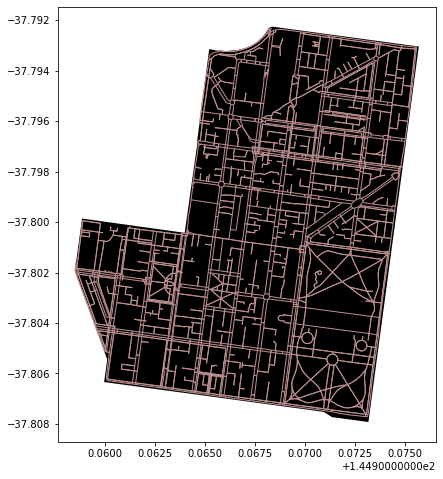

In [72]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

<AxesSubplot:>

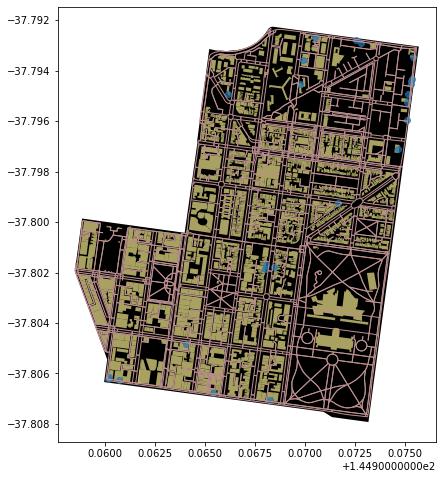

In [73]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

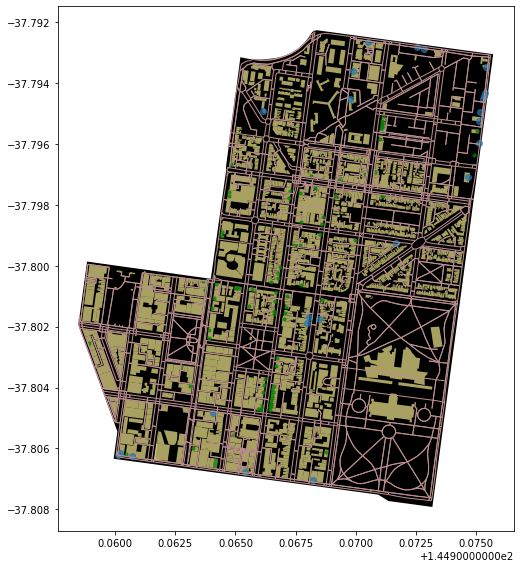

In [74]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

In [75]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3067)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)

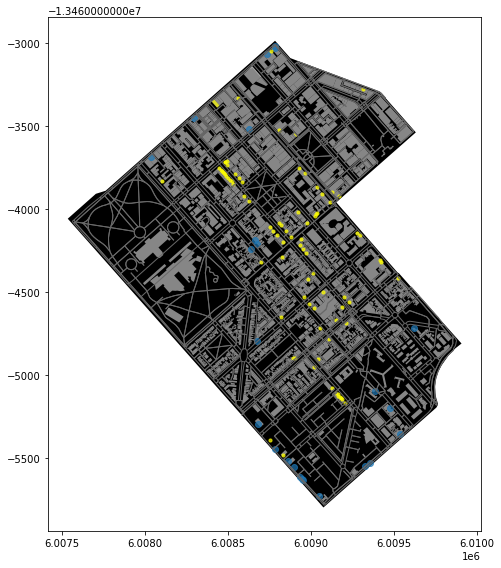

In [76]:
# Create a new plot with the re-projected layers:

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

In [77]:
leisure = ox.geometries_from_place(place_name, tags={'leisure':True})

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [82]:
leisure["leisure"].value_counts()

garden           45
park             28
pitch            11
playground        6
picnic_table      6
swimming_pool     4
sports_centre     2
Name: leisure, dtype: int64

<AxesSubplot:>

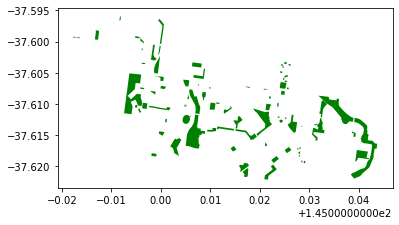

In [46]:
parks = leisure[leisure["leisure"].isin(["pitch","park","playground"])]
parks.plot(color="green")

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


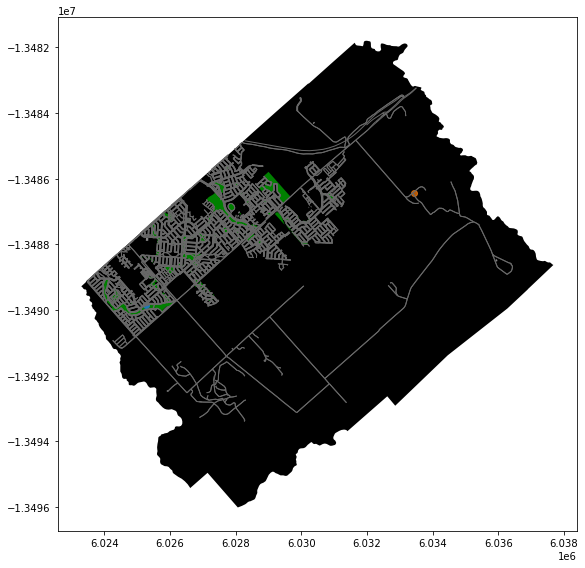

In [63]:
parks = parks.to_crs(projection)

fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()